In [1]:
import numpy as np
import qcodes as qc
from qcodes.data import hdf5_format
h5fmt = hdf5_format.HDF5Format()

from transitions import *

pyqtgraph plotting not supported, try "from qcodes.plots.pyqtgraph import QtPlot" to see the full error


In [2]:
data_2D = qc.load_data('sample_data/#004_4D_DC_TGAC_DBL_DBR_14-51-19')

data_3D = qc.load_data('sample_data/#009_fast_transition_tracking_DFR_14-22-23')
data_3D.formatter = h5fmt
data_3D.read()

# 2D Transition Identification using find_transitions()

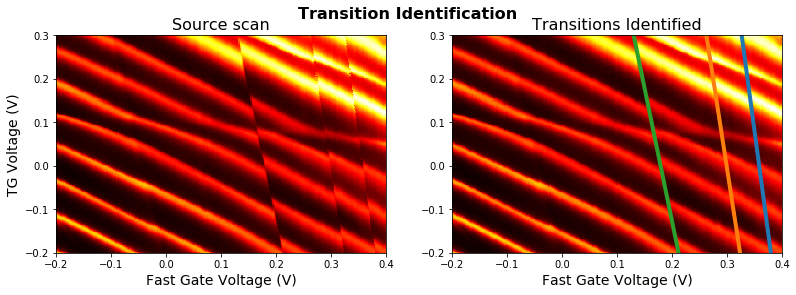

[{'dVtop': 0.012000000000000011,
  'gradient': -9.4230769230769234,
  'gradient_error': 3.8518518518518565,
  'intensity': 0.74923498378890097,
  'location': 0.38},
 {'dVtop': 0.012000000000000011,
  'gradient': -8.1666666666666661,
  'gradient_error': 3.3370411568409364,
  'intensity': 0.72094570699223226,
  'location': 0.32400000000000001},
 {'dVtop': 0.012000000000000011,
  'gradient': -6.125,
  'gradient_error': 2.5015634771732298,
  'intensity': 0.71393583876863864,
  'location': 0.21199999999999999}]

In [3]:
index_1 = 0 #Change between 0,1,2 to see different 2D charge stability diagrams.
index_2 = 2 #Change between 0,1,2 to see different 2D charge stability diagrams.
DB = data_2D.DBL_DBR_set[1,1,:]
TGAC = data_2D.DC_control_TGAC_set[1,1,1,:]
DC_voltage = data_2D.DC_voltage[index_1,index_2,:,:]
DC_voltage = np.swapaxes(DC_voltage,0,1)

find_transitions(DB,TGAC,DC_voltage,plot=True)

# 3D Transition Identification using find_transitions_3D()

[{'TG/fast gradient': -4.6285897182597706,
  'TG/slow gradient': 0.96460389629642296,
  'fast intercept': 2.1711063596862799,
  'fast/slow gradient': -4.7984356439271565}]

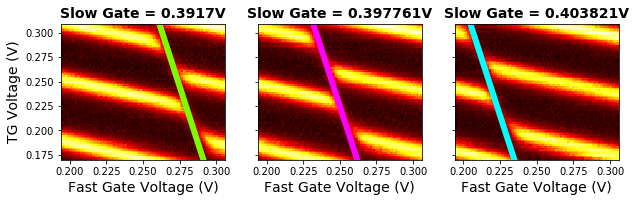

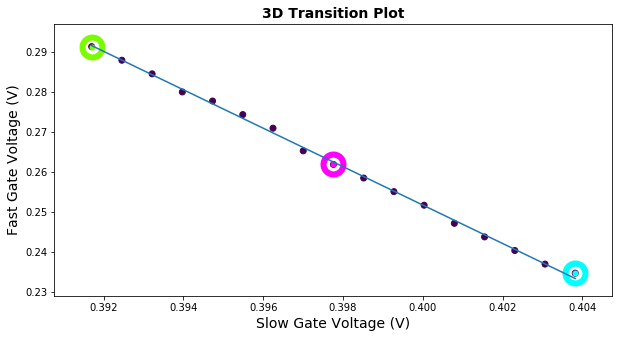

In [4]:
fast = data_3D.DBL_DBR_set[1,1,:]
TG   = data_3D.TGAC_set[1,0:87]
slow = data_3D.DC_control_DFR_set[0:85:5] 
DC_voltage = data_3D.DC_voltage[0:85:5,0:87,:]

transition_list = find_transitions_3D(slow,fast,TG,DC_voltage)
tracking        = track_transitions_single(slow, fast, TG, DC_voltage, transition_list)
plot_transitions_3D(slow, fast, TG, DC_voltage, transition_list, tracking, slices=True)
display(tracking)